<a href="https://colab.research.google.com/github/nicolaeee/Codewars/blob/main/Tema2_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install kagglehub -q

import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Descărcare dataset
path = kagglehub.dataset_download("ahmadrazakashif/bmw-worldwide-sales-records-20102024")
print("Cale dataset:", path)

# Căutăm primul CSV
import glob
csv_files = glob.glob(path + "/**/*.csv", recursive=True)
df = pd.read_csv(csv_files[0])
print("Dimensiune:", df.shape)
df.head()


Using Colab cache for faster access to the 'bmw-worldwide-sales-records-20102024' dataset.
Cale dataset: /kaggle/input/bmw-worldwide-sales-records-20102024
Dimensiune: (50000, 11)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [10]:
# Alegem prima coloană numerică drept Y
num_cols = df.select_dtypes(include=[np.number]).columns

if len(num_cols) < 2:
    raise Exception("Datasetul nu are suficiente coloane numerice pentru regresie.")

target = num_cols[0]      # prima numerică — rapid și simplu
features = num_cols[1:6]  # primele 5 features numerice

print("Target:", target)
print("Features:", list(features))

df = df.dropna(subset=[target])  # eliminăm rândurile fără target

X = df[features].fillna(0)
y = df[target]


Target: Year
Features: ['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


In [14]:
# Regresie Liniară (fără regularizare)
lr = LinearRegression()
lr.fit(X_train_s, y_train)
pred_lr = lr.predict(X_test_s)

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_s, y_train)
pred_ridge = ridge.predict(X_test_s)

# Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_s, y_train)
pred_lasso = lasso.predict(X_test_s)

# Elastic Net
enet = ElasticNet(alpha=0.01, l1_ratio=0.5)
enet.fit(X_train_s, y_train)
pred_enet = enet.predict(X_test_s)


In [15]:
def metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return round(mse, 3), round(np.sqrt(mse), 3), round(r2_score(y_true, y_pred), 3)

results = {
    "Linear": metrics(y_test, pred_lr),
    "Ridge": metrics(y_test, pred_ridge),
    "Lasso": metrics(y_test, pred_lasso),
    "ElasticNet": metrics(y_test, pred_enet),
}

results_df = pd.DataFrame(results, index=["MSE", "RMSE", "R2"])
results_df


,Linear,Ridge,Lasso,ElasticNet
MSE,18.882,18.882,18.880,18.881
RMSE,4.345,4.345,4.345,4.345
R2,-0.000,-0.000,-0.000,-0.000


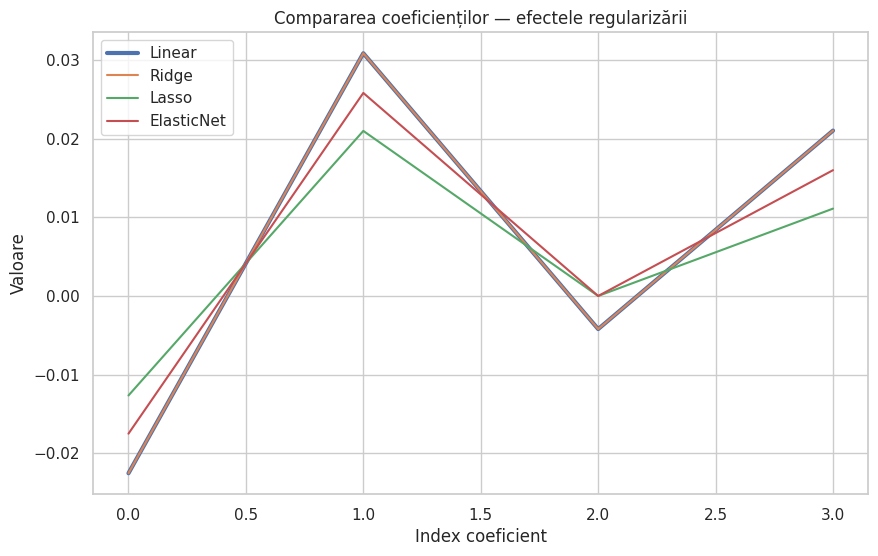

In [16]:
plt.figure(figsize=(10,6))

plt.plot(lr.coef_, label="Linear", linewidth=3)
plt.plot(ridge.coef_, label="Ridge")
plt.plot(lasso.coef_, label="Lasso")
plt.plot(enet.coef_, label="ElasticNet")

plt.title("Compararea coeficienților — efectele regularizării")
plt.xlabel("Index coeficient")
plt.ylabel("Valoare")
plt.legend()
plt.grid(True)
plt.show()
